## ANA630 - Advanced Analytic Applications
### Dave Terando
### Project: EDA and Dataset Refinement

In [18]:
## Import Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
pip install nfl_data_py pandas numpy scikit-learn matplotlib seaborn

In [2]:
import nfl_data_py as nfl
import pandas as pd
# Load play-by-play data for selected year
years = [2020, 2021, 2022, 2023, 2024]  
data = nfl.import_pbp_data(years, downcast=True)

2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.


In [4]:
data.shape

(246218, 397)

In [7]:
# Filter for 4th down plays where teams attempt a pass or run
fourth_downs = data[(data['down'] == 4) & (data['play_type'].isin(['pass', 'run']))]

In [8]:
fourth_downs.shape

(3932, 397)

In [19]:
data.head()

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,was_pressure,route,defense_man_zone_type,defense_coverage_type,offense_names,defense_names,offense_positions,defense_positions,offense_numbers,defense_numbers
0,1.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,None,None,None,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,39.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,54.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,False,OUT,MAN_COVERAGE,COVER_1,NaN,NaN,NaN,NaN,NaN,NaN
3,93.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,118.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
fourth_downs.head()

,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,was_pressure,route,defense_man_zone_type,defense_coverage_type,offense_names,defense_names,offense_positions,defense_positions,offense_numbers,defense_numbers
49,1268.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
179,4508.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,False,OUT,MAN_COVERAGE,COVER_1,NaN,NaN,NaN,NaN,NaN,NaN
206,368.0,2020_01_CHI_DET,2020091304,DET,CHI,REG,1,CHI,away,DET,...,True,IN,MAN_COVERAGE,COVER_1,NaN,NaN,NaN,NaN,NaN,NaN
320,3131.0,2020_01_CHI_DET,2020091304,DET,CHI,REG,1,CHI,away,DET,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
402,478.0,2020_01_CLE_BAL,2020091301,BAL,CLE,REG,1,CLE,away,BAL,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print(fourth_downs.columns)

Index(['play_id', 'game_id', 'old_game_id_x', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'was_pressure', 'route', 'defense_man_zone_type',
       'defense_coverage_type', 'offense_names', 'defense_names',
       'offense_positions', 'defense_positions', 'offense_numbers',
       'defense_numbers'],
      dtype='object', length=397)


In [22]:
# Display the variables and data types for select rows
# Iterate through all 397 variables for initial review for relavence to 4th down decision making.
print(fourth_downs.dtypes.iloc[0:50])

play_id                      float32
game_id                       object
old_game_id_x                 object
home_team                     object
away_team                     object
season_type                   object
week                           int32
posteam                       object
posteam_type                  object
defteam                       object
side_of_field                 object
yardline_100                 float32
game_date                     object
quarter_seconds_remaining    float32
half_seconds_remaining       float32
game_seconds_remaining       float32
game_half                     object
quarter_end                  float32
drive                        float32
sp                           float32
qtr                          float32
down                         float32
goal_to_go                     int32
time                          object
yrdln                         object
ydstogo                      float32
ydsnet                       float32
d

#### After iterating through and reviewing the 397 variables I selected the following 13 variables for further review.  From my domain understanding I feel they provide the essence of what goes into the calculation of the decision whether to go for it or not on 4th down.

In [71]:
# build dataset for fourth downs and relevant variables
selected_columns = ['series_success', 'fourth_down_converted', 'fourth_down_failed', 'first_down', 'yardline_100', 'ydstogo', 'yards_gained', 
                      'score_differential', 'game_seconds_remaining', 'epa', 'wp', 'rush_attempt', 'pass_attempt']

fourth_down_df = fourth_downs[selected_columns].copy()

In [72]:
fourth_down_df.shape

(3932, 13)

In [66]:
fourth_down_df.head(10)

,series_success,fourth_down_converted,fourth_down_failed,first_down,yardline_100,ydstogo,yards_gained,score_differential,game_seconds_remaining,epa,wp,rush_attempt,pass_attempt,ep
49,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,2557.0,-4.137538,0.696081,1.0,0.0,4.616242
179,0.0,0.0,1.0,0.0,16.0,5.0,0.0,-4.0,37.0,-2.542086,0.427271,0.0,1.0,2.465330
206,0.0,0.0,1.0,0.0,34.0,7.0,0.0,0.0,3242.0,-3.245736,0.423617,0.0,1.0,0.787785
320,1.0,1.0,0.0,1.0,10.0,1.0,3.0,-17.0,900.0,1.748239,0.042113,1.0,0.0,3.810780
402,0.0,0.0,1.0,0.0,69.0,4.0,-2.0,-7.0,3077.0,-3.302165,0.196006,1.0,0.0,-1.202093
506,0.0,0.0,1.0,0.0,28.0,4.0,-14.0,-25.0,1088.0,-4.303210,0.004232,0.0,1.0,1.869537
528,0.0,0.0,1.0,0.0,48.0,6.0,0.0,-32.0,611.0,-2.528653,0.000073,0.0,1.0,-0.083242
578,1.0,1.0,0.0,1.0,41.0,1.0,2.0,7.0,3014.0,2.173787,0.729071,1.0,0.0,1.518588
701,0.0,0.0,1.0,0.0,11.0,3.0,2.0,-3.0,706.0,-3.294907,0.462607,0.0,1.0,2.929079
729,1.0,1.0,0.0,1.0,70.0,1.0,4.0,-3.0,56.0,0.878722,0.175997,1.0,0.0,0.108034


In [73]:
print(fourth_downs[['series_success', 'fourth_down_converted', 'fourth_down_failed', 'first_down', 'yardline_100', 'ydstogo',
                    'yards_gained', 'score_differential', 'game_seconds_remaining', 'epa', 'wp', 'rush_attempt',
                    'pass_attempt']].describe().round(3))

       series_success  fourth_down_converted  fourth_down_failed  first_down  \
count        3932.000               3932.000            3932.000    3932.000   
mean            0.539                  0.538               0.461       0.539   
std             0.499                  0.499               0.499       0.499   
min             0.000                  0.000               0.000       0.000   
25%             0.000                  0.000               0.000       0.000   
50%             1.000                  1.000               0.000       1.000   
75%             1.000                  1.000               1.000       1.000   
max             1.000                  1.000               1.000       1.000   

       yardline_100   ydstogo  yards_gained  score_differential  \
count      3932.000  3932.000      3932.000            3932.000   
mean         37.508     4.016         4.536              -5.939   
std          21.764     4.493         8.702              11.515   
min        

#### After further research and review of the online data dictionary (https://nflreadr.nflverse.com/articles/dictionary_pbp.html) I determined the following:

##### Output variable: series_success was my chosen output variable.  It was redundant with the data contained in fourth_down_converted, fourth_down_failed and first_down.

##### Feature variable: I have selected yardline_100, ydstogo, score_differential and game_seconds_remaining as my initial feature variable as they provide the essence of what goes into the decision of deciding whether to go for it or not on 4th down.

##### I am still deciding if epa (Expected Points Added) and wp (Win Probability) would add value as additional feature variables.  They are manufactured variables that incorporate “game context” into the calculation, but may be redundant.  Further analysis is needed.


In [84]:
# Count the class distribution for output variable (series_succes) to check for balance 
counts = fourth_down_df.series_success.value_counts()
print(counts)

1.0    2118
0.0    1814
Name: series_success, dtype: int64


The binary output variable, 1 = succesfull 4th down play, 0 = unsucsessful 4th down play, is evenly distributed. 

In [32]:
# build a df for 'features'
features_df = fourth_down_df[['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining']]

In [38]:
print(features_df.describe().round(3))

       yardline_100   ydstogo  score_differential  game_seconds_remaining
count      3932.000  3932.000            3932.000                3932.000
mean         37.508     4.016              -5.939                1262.054
std          21.764     4.493              11.515                1068.893
min           1.000     1.000             -50.000                   1.000
25%          21.000     1.000             -14.000                 255.000
50%          38.000     2.000              -6.000                 976.000
75%          53.000     5.000               0.000                2132.250
max          99.000    34.000              46.000                3555.000


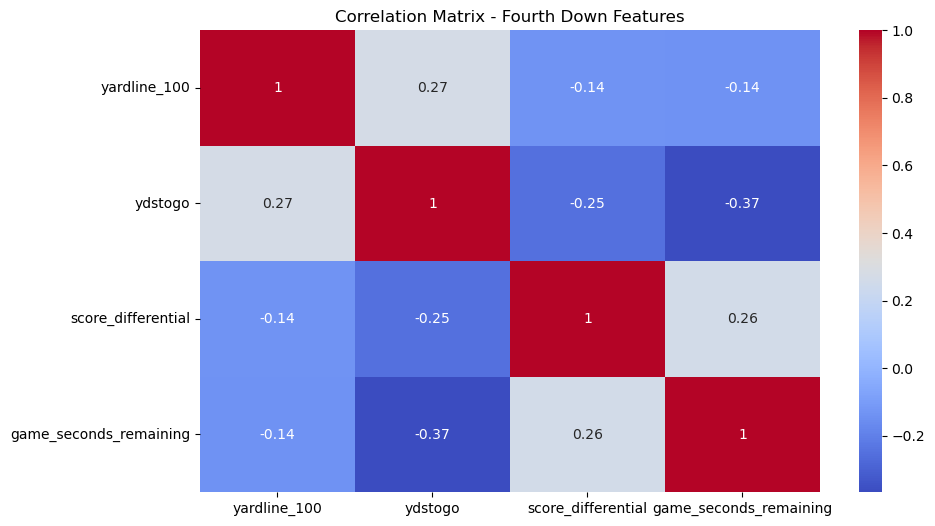

In [36]:
# Create correlation heatmap of features.
plt.figure(figsize=(10, 6))
sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Fourth Down Features')
plt.show()

No major issues with correlation seen in the correlation matrix.

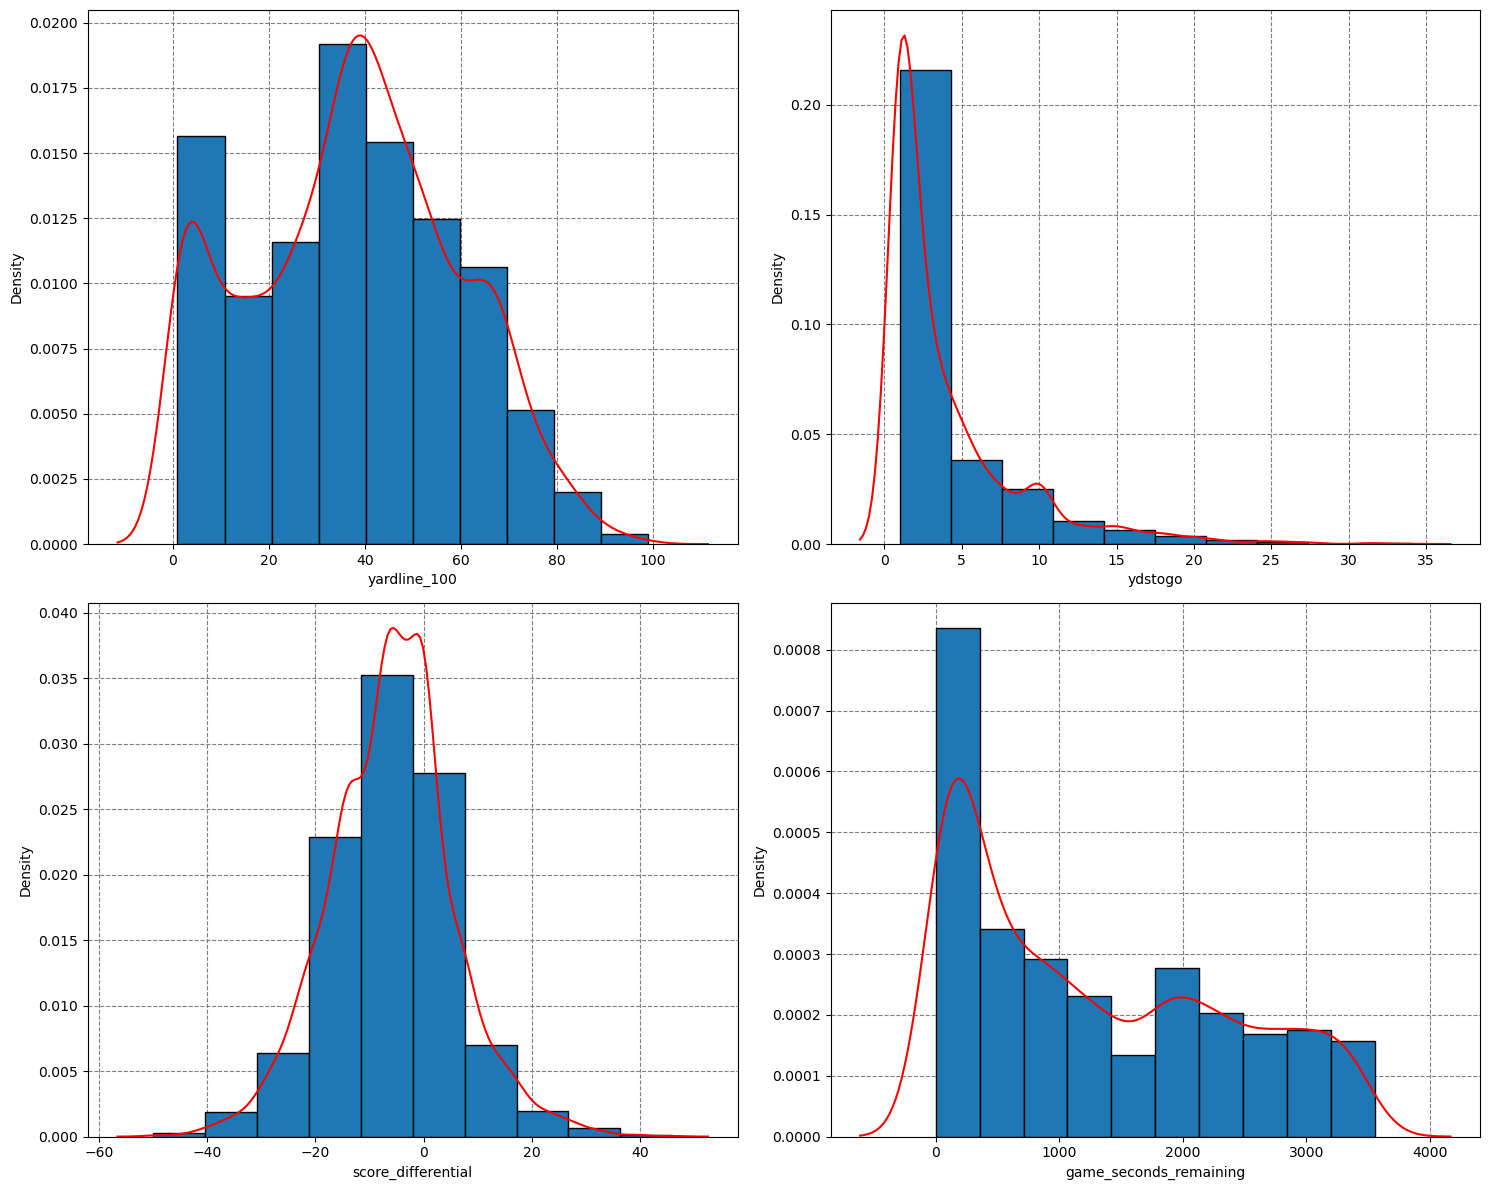

In [37]:
# Create a grid of subplots: 2 rows, 2 columns (to fit 4 features)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Iterate over continuous variables and plot histograms with KDE
for i, var in enumerate(features_df):
    # Plot histogram
    axes[i].hist(features_df[var], edgecolor='black', density=True)  # Set density=True for proper KDE scaling
    axes[i].set_axisbelow(True)  # Show grid lines behind the histogram
    axes[i].grid(which='major', color='grey', linestyle='--')
    axes[i].set_xlabel(var)  # Use variable name as x-label
    axes[i].set_ylabel('Density')  # Change to 'Density' to match KDE scaling
    
    # Overlay KDE plot in red
    sns.kdeplot(data=features_df[var], color='red', ax=axes[i])

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

#### The histograms with KDE (Kernel Density Estimation) overlays show the distribution of the four initial features:

1. Yardline-100: Peaks around 40-60 yards, indicating most plays occur in the middle field, with a slight skew toward the opponent's side. The KDE smooths this into a roughly symmetric curve.

2.Yards to Go (ydstogo): Highly skewed, with a sharp peak near 4 yards (confirmed by the Mean of yards to go seen above), suggesting most 4th down plays start with a 4-yard requirement, and fewer instances as yards increase.  It should be noted that for this project I filtered for run and pass plays, so any 4th down play that was predetermined to be a kick was not included.

3. Score Differential: Centered around 0, with a broad peak, indicating most games are close, with a slight spread to positive and negative differentials (leading or trailing by up to ~ 45 points).

4. Game Seconds Remaining: Strongly right-skewed, with a peak near 0 seconds, showing most data points are from late in games, tapering off as time increases up to 3500 seconds. There is a secondary peak near 2000 seconds, which coincides with the end of the first half.  Each half of an NFL game is 1800 seconds. 

Overall, I feel the distributions reflect typical football game dynamics, and the displayed rightward skew of a couple of the features does not expose a problem of outliers.

In [75]:
# build a df for expanded features df with epa and wp for evaluation
expanded_features_df = fourth_down_df[['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining', 'epa', 'wp']]

In [76]:
print(expanded_features_df.describe().round(3))

       yardline_100   ydstogo  score_differential  game_seconds_remaining  \
count      3932.000  3932.000            3932.000                3932.000   
mean         37.508     4.016              -5.939                1262.054   
std          21.764     4.493              11.515                1068.893   
min           1.000     1.000             -50.000                   1.000   
25%          21.000     1.000             -14.000                 255.000   
50%          38.000     2.000              -6.000                 976.000   
75%          53.000     5.000               0.000                2132.250   
max          99.000    34.000              46.000                3555.000   

            epa        wp  
count  3932.000  3932.000  
mean      0.090     0.346  
std       2.982     0.317  
min     -11.448     0.000  
25%      -2.879     0.042  
50%       1.450     0.274  
75%       2.527     0.588  
max       8.043     1.000  


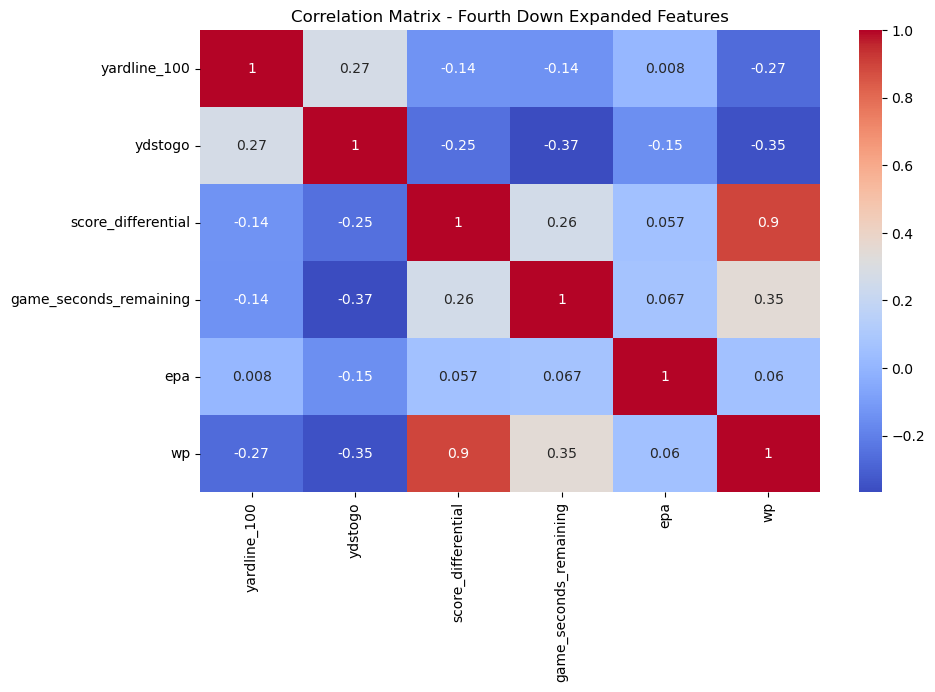

In [77]:
# Create correlation heatmap of features.
plt.figure(figsize=(10, 6))
sns.heatmap(expanded_features_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Fourth Down Expanded Features')
plt.show()

The correlation matrix of the expanded feature list, containing epa and wp does show extreme correlation between wp and score_differential, which makes sense as a higher score differential would lead to a higher win probability.  This could reduce the usefulness of wp based on potential multicolliniarity.

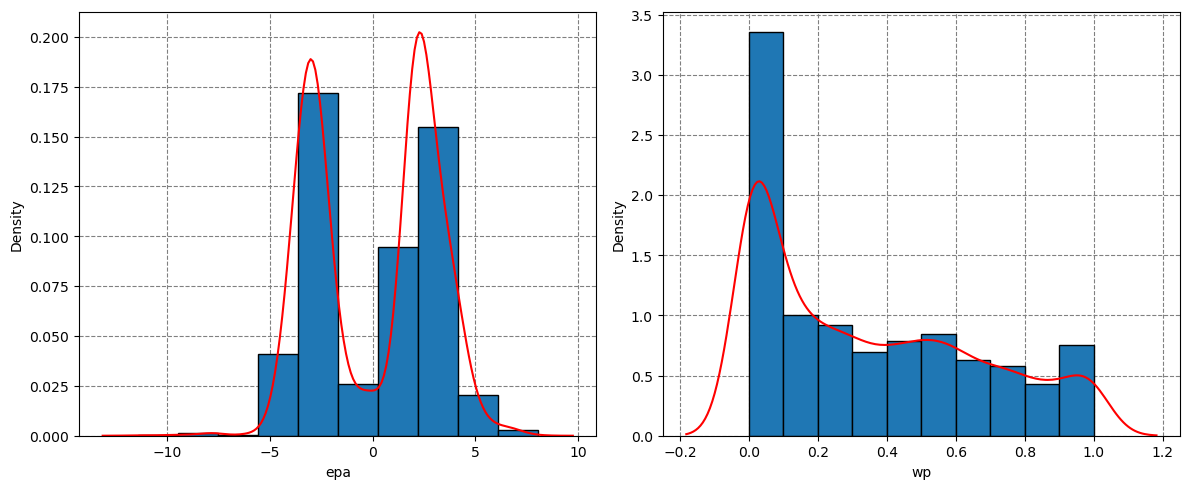

In [55]:
# Create a grid of subplots: 1 rows, 2 columns (to fit 6 features)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

new_variables = ['epa', 'wp']

# Iterate over continuous variables and plot histograms with KDE
for i, var in enumerate(new_variables):
    # Plot histogram
    axes[i].hist(expanded_features_df[var], edgecolor='black', density=True)  # Set density=True for proper KDE scaling
    axes[i].set_axisbelow(True)  # Show grid lines behind the histogram
    axes[i].grid(which='major', color='grey', linestyle='--')
    axes[i].set_xlabel(var)  # Use variable name as x-label
    axes[i].set_ylabel('Density')  # Change to 'Density' to match KDE scaling
    
    # Overlay KDE plot in red
    sns.kdeplot(data=expanded_features_df[var], color='red', ax=axes[i])

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

The epa histogram shows a bimodal distribution with peaks at +3 and -3, which makes sense.  Because this is a statistic that is calculated after the play is over, a successful fourth attempt would lead to at least a potential field goal (3 points). Conversely a unsuccessful 4th down attempt would give the opponent the ball at the current location, providing better field position compared to a 4th down kick.  This would lead to a rise of expected points added for your opponent and result with a similar decrease in expected points added for the team attempting the 4th down attempt (-3 points).

The wp histogram is a little harder to interpret.  With the peak near zero it shows that most 4th down plays do not increase a teams win probability, and that makes sense when we go back to the distribution of series_success, which showed an approximately 54% success ratio, so close to  half the time a teams win probably would not change (a 0 in WP change on that play). Additionally if a team is so far behind in game differential late in the game, even a successful fourth down attempt may not change a teams win probability. 

### Show Histograms broken down by series_success.

In [85]:
# Select relevant features
features = ['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining', 'epa', 'wp']

In [86]:
X = fourth_down_df[features].fillna(0)
y = fourth_down_df['series_success']  # Binary target (1=success, 0=failure)

print ("Shape:", X. shape)
print("Target distribution (0=no, 1=yes):")
print (y.value_counts())
display(X.head())

Shape: (3932, 6)
Target distribution (0=no, 1=yes):
1.0    2118
0.0    1814
Name: series_success, dtype: int64


,yardline_100,ydstogo,score_differential,game_seconds_remaining,epa,wp
49,1.0,1.0,3.0,2557.0,-4.137538,0.696081
179,16.0,5.0,-4.0,37.0,-2.542086,0.427271
206,34.0,7.0,0.0,3242.0,-3.245736,0.423617
320,10.0,1.0,-17.0,900.0,1.748239,0.042113
402,69.0,4.0,-7.0,3077.0,-3.302165,0.196006


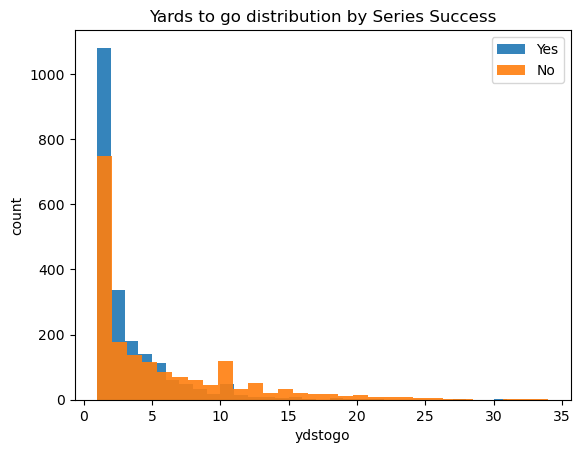

In [60]:
# histogram for a feature split by outcome (yards to go)
plt. figure()
plt.hist(X['ydstogo'][y==1], bins=30, alpha=0.9, label='Yes')
plt.hist(X['ydstogo'][y==0], bins=30, alpha=0.9, label='No')
plt. title("Yards to go distribution by Series Success")
plt. xlabel ("ydstogo")
plt. ylabel ("count")
plt. legend ()
plt.show()

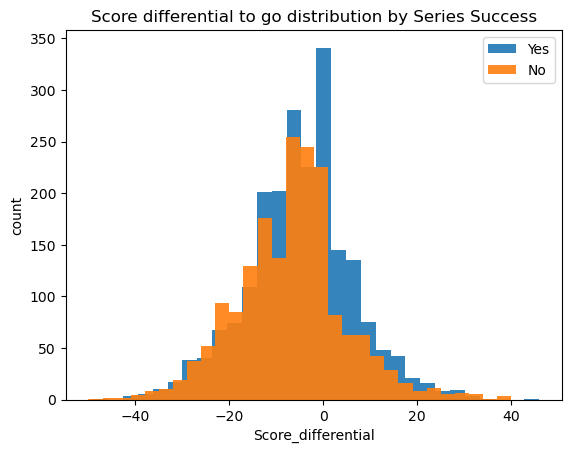

In [61]:
# histogram for a feature split by outcome (score differential)
plt. figure()
plt.hist(X['score_differential'][y==1], bins=30, alpha=0.9, label='Yes')
plt.hist(X['score_differential'][y==0], bins=30, alpha=0.9, label='No')
plt. title("Score differential distribution by Series Success")
plt. xlabel ("Score_differential")
plt. ylabel ("count")
plt. legend ()
plt.show()

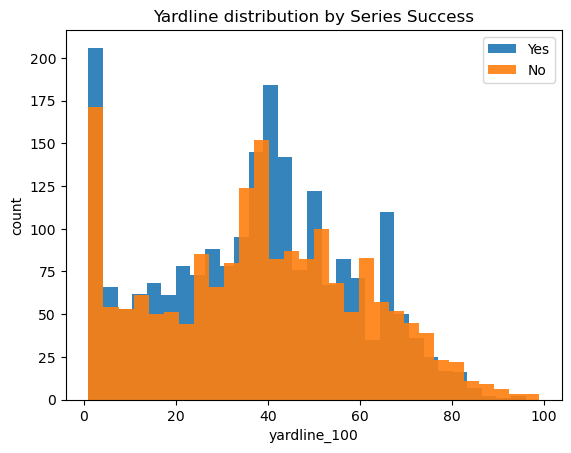

In [62]:
# histogram for a feature split by outcome (yardline)
plt. figure()
plt.hist(X['yardline_100'][y==1], bins=30, alpha=0.9, label='Yes')
plt.hist(X['yardline_100'][y==0], bins=30, alpha=0.9, label='No')
plt. title("Yardline distribution by Series Success")
plt. xlabel ("yardline_100")
plt. ylabel ("count")
plt. legend ()
plt.show()

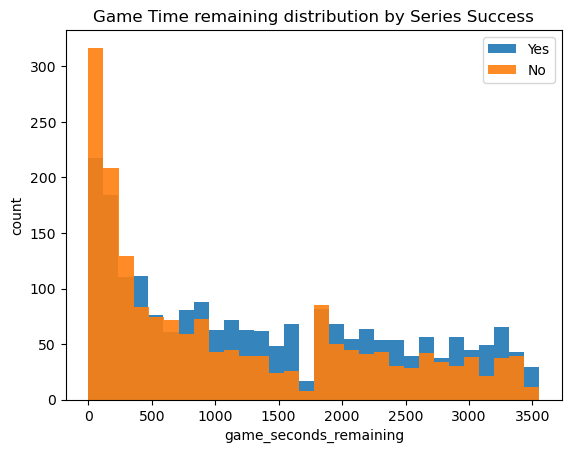

In [88]:
# histogram for a feature split by outcome (game_seconds_remaining)
plt. figure()
plt.hist(X['game_seconds_remaining'][y==1], bins=30, alpha=0.9, label='Yes')
plt.hist(X['game_seconds_remaining'][y==0], bins=30, alpha=0.9, label='No')
plt. title("Game Time remaining distribution by Series Success")
plt. xlabel ("game_seconds_remaining")
plt. ylabel ("count")
plt. legend ()
plt.show()

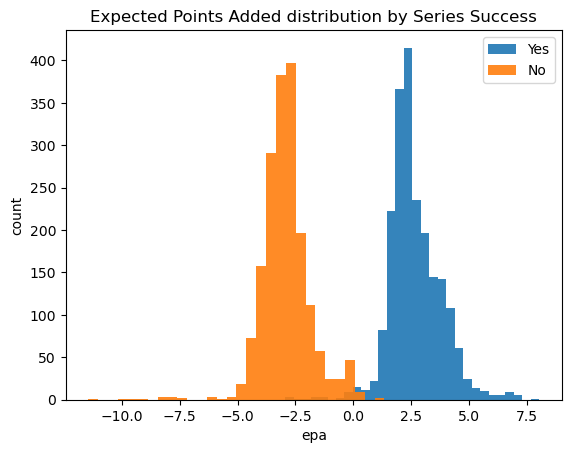

In [87]:
# histogram for a feature split by outcome (epa)
plt. figure()
plt.hist(X['epa'][y==1], bins=30, alpha=0.9, label='Yes')
plt.hist(X['epa'][y==0], bins=30, alpha=0.9, label='No')
plt. title("Expected Points Added distribution by Series Success")
plt. xlabel ("epa")
plt. ylabel ("count")
plt. legend ()
plt.show()

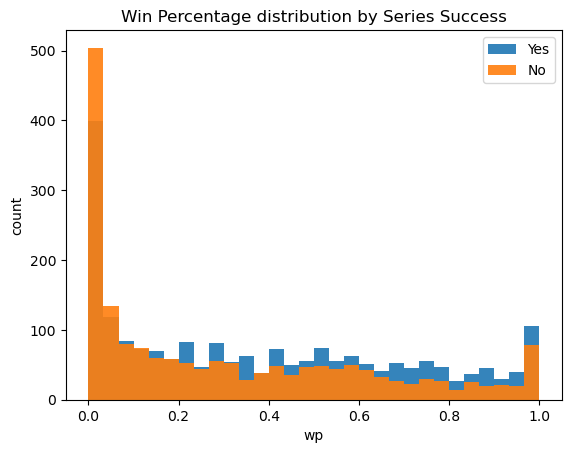

In [90]:
# Simple histogram for an informative numeric feature (yardline)
plt. figure()
plt.hist(X['wp'][y==1], bins=30, alpha=0.9, label='Yes')
plt.hist(X['wp'][y==0], bins=30, alpha=0.9, label='No')
plt. title("Win Percentage distribution by Series Success")
plt. xlabel ("wp")
plt. ylabel ("count")
plt. legend ()
plt.show()

Histograms of the features broken down by outcome generally maintain the same overall shape and distribution but do show some differences based on outcome.  For example, with yards to go, a successful outcome (yes) is much more probable with lower yards to go.  Once again this coincides with what would be expected from football game dynamics. The histogram of epa split between outcome shows the most dramatic difference and clearly demonstrates what I was attempting to explain above.  A successful fourth down attempt increases a teams expected points added and an unsuccessful fourth down attempt reduces a teams expected points added.  The wp histogram is somewhat puzzling, as I find it hard to see how a failed fourth down attempt would keep a teams wp at or near 1, but that could be a result of a team having such a lead late in the game that it’s virtually impossible for them to lose, even if they fail on a fourth down attempt. Similarly, if a team is so far behind in game differential late in the game, even a successful fourth down attempt may not change a teams win probability.

After further analyses and research I am going back and adding the ep (estimated expected points) variable for consideration in my model. This variable is based on the expected probaility of success of the play and not calculated after the resulrs of the play are known like epa.

In [78]:
# Rebuild fourth down dataset which adds ep
selected_columns = ['series_success', 'fourth_down_converted', 'fourth_down_failed', 'first_down', 'yardline_100', 'ydstogo', 'yards_gained', 
                      'score_differential', 'game_seconds_remaining', 'epa', 'wp', 'rush_attempt', 'pass_attempt', 'ep']

fourth_down_df = fourth_downs[selected_columns].copy()

In [79]:
fourth_down_df.shape

(3932, 14)

In [ ]:
print(fourth_downs[['series_success', 'fourth_down_converted', 'fourth_down_failed', 'first_down', 'yardline_100', 'ydstogo',
                    'yards_gained', 'score_differential', 'game_seconds_remaining', 'epa', 'wp', 'rush_attempt',
                    'pass_attempt']].describe().round(3))

In [80]:
# build a df for expanded features df with addition of ep evaluation
expanded_features_df_2 = fourth_down_df[['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining', 'epa', 'wp', 'ep']]

In [81]:
print(expanded_features_df_2.describe().round(3))

       yardline_100   ydstogo  score_differential  game_seconds_remaining  \
count      3932.000  3932.000            3932.000                3932.000   
mean         37.508     4.016              -5.939                1262.054   
std          21.764     4.493              11.515                1068.893   
min           1.000     1.000             -50.000                   1.000   
25%          21.000     1.000             -14.000                 255.000   
50%          38.000     2.000              -6.000                 976.000   
75%          53.000     5.000               0.000                2132.250   
max          99.000    34.000              46.000                3555.000   

            epa        wp        ep  
count  3932.000  3932.000  3932.000  
mean      0.090     0.346     1.349  
std       2.982     0.317     1.519  
min     -11.448     0.000    -2.664  
25%      -2.879     0.042     0.113  
50%       1.450     0.274     1.020  
75%       2.527     0.588     2.597  
ma

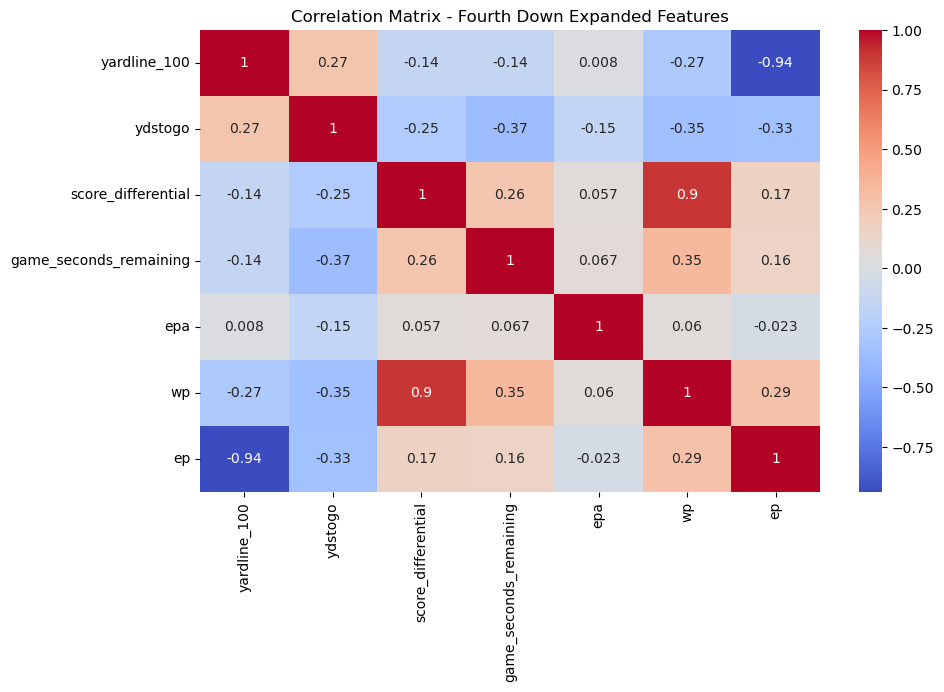

In [82]:
# Create new correlation heatmap of features.
plt.figure(figsize=(10, 6))
sns.heatmap(expanded_features_df_2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Fourth Down Expanded Features')
plt.show()

Interestingly the new variable ep is highly negatively correlated with yards_100.  I guess this makes sense as the further away from the goal line a play is the less a successful play will increase a teams expected points.  It will be intersecting to see how this new variable impacts the models.

In [92]:
# Select relevant features
features = ['yardline_100', 'ydstogo', 'score_differential', 'game_seconds_remaining', 'epa', 'wp', 'ep']

In [94]:
X = fourth_down_df[features].fillna(0)
y = fourth_down_df['series_success']  # Binary target (1=success, 0=failure)

print ("Shape:", X. shape)
print("Target distribution (0=no, 1=yes):")
print (y.value_counts())
display(X.head())

Shape: (3932, 7)
Target distribution (0=no, 1=yes):
1.0    2118
0.0    1814
Name: series_success, dtype: int64


,yardline_100,ydstogo,score_differential,game_seconds_remaining,epa,wp,ep
49,1.0,1.0,3.0,2557.0,-4.137538,0.696081,4.616242
179,16.0,5.0,-4.0,37.0,-2.542086,0.427271,2.465330
206,34.0,7.0,0.0,3242.0,-3.245736,0.423617,0.787785
320,10.0,1.0,-17.0,900.0,1.748239,0.042113,3.810780
402,69.0,4.0,-7.0,3077.0,-3.302165,0.196006,-1.202093


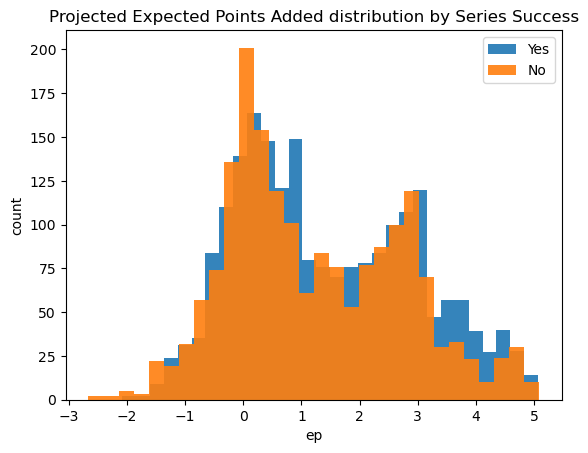

In [95]:
# histogram for a feature split by outcome (epa)
plt. figure()
plt.hist(X['ep'][y==1], bins=30, alpha=0.9, label='Yes')
plt.hist(X['ep'][y==0], bins=30, alpha=0.9, label='No')
plt. title("Projected Expected Points Added distribution by Series Success")
plt. xlabel ("ep")
plt. ylabel ("count")
plt. legend ()
plt.show()

The ep histogram by series success is very informative and visually displays the difference between it and epa.  It is bimodal as is the epa histogram, but when broken down by outcome it is still spread throughout the entire range rather than showing two separate peaks by outcome as with epa.  We can infer that this difference is do to epa being calculated after the fact with a known outcome for the play, whereas ep is using the probability of success for the play before it happens.  I feel this may be much more useful in a predictive modeling scenario.

In [83]:
# save fourth_down_df for easy access in new notebook
fourth_down_df.to_csv('fourth_down_dataframe.csv', index=False) # index=False prevents writing the DataFrame index as a column